In [2]:
import os
import glob
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from dynamic_routing_analysis import decoding_utils#, plot_utils
import dynamic_routing_analysis as dra

import matplotlib
import matplotlib.font_manager as fm

matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
fm.FontProperties().set_family('arial')

%load_ext autoreload
%autoreload 2
%matplotlib inline
# %matplotlib widget

In [3]:
loadpath={}

# loadpath['no_unit_criteria']=r"D:\decoding_results_from_CO\n_units_test_2024-11-06"
# loadpath['svc_medium_unit_criteria']=r"D:\decoding_results_from_CO\n_units_test_medium_unit_criteria_2024-11-07"
# loadpath['lda_medium_criteria']=r"D:\decoding_results_from_CO\lda_test_2024-11-11"
# loadpath['logreg_medium_criteria']=r"D:\decoding_results_from_CO\logreg_test_2024-11-13"

# loadpath['no_unit_criteria']=r"D:\decoding_results_from_CO\n_units_test_2024-11-06" 
# loadpath['logreg_medium_criteria']=r"D:\decoding_results_from_CO\logreg_many_n_units_medium_criteria_2025-01-08" 
# loadpath['logreg_strict_criteria']=r"D:\decoding_results_from_CO\logreg_many_n_units_strict_criteria_2024_12_19"
loadpath['logreg_sliding_rp_criteria']=r"D:\decoding_results_from_CO\logreg_many_n_units_sliding_rp_criteria_2024-12-20"
loadpath['recalc_presence_ratio']=r"D:\decoding_results_from_CO\recalc_presence_ratio_2024-01-31"

In [4]:
decoder_results={}
session_list={}
for ll in loadpath.keys():
    all_decoder_results_path=os.path.join(loadpath[ll],'decoder_results_summary.csv')
    decoder_results[ll]=pd.read_csv(all_decoder_results_path)
    session_list[ll]=decoder_results[ll]['session_id'].unique()

In [5]:
#need to match sessions
# shared_sessions=np.intersect1d(np.intersect1d(np.intersect1d(
#     session_list['no_unit_criteria'],session_list['svc_medium_unit_criteria']),
#     session_list['lda_medium_criteria']),session_list['logreg_medium_criteria'])

# shared_sessions=np.intersect1d(np.intersect1d(
#     session_list['logreg_medium_criteria'],session_list['svc_medium_unit_criteria']),
#     session_list['lda_medium_criteria'])
# shared_sessions

# shared_sessions=np.intersect1d(np.intersect1d(
#     session_list['logreg_medium_criteria'],session_list['logreg_strict_criteria']),
#     session_list['logreg_sliding_rp_criteria'])
# shared_sessions

# shared_sessions=np.intersect1d(np.intersect1d(np.intersect1d(
#     session_list['logreg_medium_criteria'],session_list['no_unit_criteria']),
#     session_list['logreg_strict_criteria']), session_list['logreg_sliding_rp_criteria'])
# shared_sessions

shared_sessions=np.intersect1d(
    session_list['logreg_sliding_rp_criteria'],session_list['recalc_presence_ratio']
    )
shared_sessions

array(['620263_2022-07-26', '620263_2022-07-27', '620264_2022-08-02',
       '626791_2022-08-15', '626791_2022-08-16', '626791_2022-08-17',
       '628801_2022-09-19', '636397_2022-09-26', '636397_2022-09-27',
       '636766_2023-01-23', '636766_2023-01-24', '644547_2022-12-05',
       '644547_2022-12-06', '644864_2023-02-02', '644866_2023-02-08',
       '644866_2023-02-09', '644866_2023-02-10', '644867_2023-02-20',
       '644867_2023-02-22', '644867_2023-02-23', '646318_2023-01-17',
       '649943_2023-02-13', '649943_2023-02-14', '649943_2023-02-15',
       '649943_2023-02-16', '649944_2023-02-27', '649944_2023-02-28',
       '660023_2023-08-09', '662892_2023-08-21', '662892_2023-08-22',
       '662892_2023-08-23', '662892_2023-08-24', '662983_2023-05-15',
       '664851_2023-11-13', '664851_2023-11-14', '664851_2023-11-15',
       '664851_2023-11-16', '666986_2023-08-14', '666986_2023-08-15',
       '666986_2023-08-17', '667252_2023-09-26', '667252_2023-09-28',
       '668755_2023-

In [ ]:
#limit to good behavior dr sessions!


In [6]:
# area='MOs'
# areas=decoder_results['logreg_medium_criteria']['area'].unique()
areas=decoder_results['logreg_sliding_rp_criteria']['area'].unique()

savepath=r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\quick figures\2025-02-03-recalc_presence_ratio"
plot_n_units=[20,30]
min_n_good_blocks=4

decoding_accuracy_by_n_units={}

for ll in list(loadpath.keys())[:]:
    decoding_accuracy_by_n_units[ll]={
        'area':[],
        'n_units':[],
        'accuracy':[],
        'sem':[],
    }

for area in areas:

    fig,ax=plt.subplots(1,1,figsize=(4,3))

    for ll in list(loadpath.keys())[:]:

        all_decoder_results=decoder_results[ll].query('area==@area and session_id in @shared_sessions and ' 
                                                    'project=="DynamicRouting" and n_good_blocks>=@min_n_good_blocks')
        #compute fraction significant, difference from null for DynamicRouting and Templeton projects
        all_frac_sig_df,all_diff_from_null_df=decoding_utils.compute_significant_decoding_by_area(all_decoder_results)

        unique_areas=all_decoder_results['area'].unique()
        n_units=[]
        n_units_int=[]
        for col in all_frac_sig_df.filter(like='frac_sig_DR').columns.values:
            if len(col.split('_'))==4:
                if col.split('_')[3]=='all':
                    continue

                n_units.append('_'+col.split('_')[3])
                n_units_int.append(int(col.split('_')[3]))
                
            else:
                n_units.append('')
                n_units_int.append(None)

        n_units_int=np.array(n_units_int)

        # for area in unique_areas[:]:

        area_df=all_diff_from_null_df.query('area==@area')

        temp_accuracy=[]
        temp_sem=[]

        for nu in n_units:
            if nu=='all':
                continue
            if len(area_df['diff_from_null_median_DR'+nu].values)==0:
                continue
            temp_accuracy.append(area_df['diff_from_null_median_DR'+nu].values[0])
            temp_sem.append(area_df['diff_from_null_sem_DR'+nu].values[0])

        # if len(temp_accuracy)==0:
        #     continue

        temp_accuracy=np.array(temp_accuracy)
        temp_sem=np.array(temp_sem)

        if len(temp_accuracy)==0:
            continue

        n_units_incl=[]
        for ii,nui in enumerate(n_units_int):
            if nui in plot_n_units:
                n_units_incl.append(ii)
        n_units_incl=np.array(n_units_incl)

        # ax.axhline(y=0,color='k',linestyle='--',alpha=0.5)
        ax.errorbar(n_units_int[n_units_incl],temp_accuracy[n_units_incl],
                    yerr=temp_sem[n_units_incl],marker='.',linestyle='-',label=ll)
        ax.set_xlabel('number of units')
        ax.set_ylabel('decoder accuracy above null')
        ax.set_title(area)
        # ax.set_ylim([-0.05,0.25])

        decoding_accuracy_by_n_units[ll]['area'].append(area)
        decoding_accuracy_by_n_units[ll]['n_units'].append(n_units_int[n_units_incl])
        decoding_accuracy_by_n_units[ll]['accuracy'].append(temp_accuracy[n_units_incl])
        decoding_accuracy_by_n_units[ll]['sem'].append(temp_sem[n_units_incl])


    ax.legend()
    fig.savefig(os.path.join(savepath,area.replace('/','-')+'_decoder_acc_by_n_units_comp.png'),format='png',bbox_inches='tight')
    plt.close(fig)

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_20092\2941462549.py:91: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_20092\2941462549.py:91: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_20092\2941462549.py:91: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_20092\2941462549.py:91: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is

In [7]:
#convert to dataframe
decoding_accuracy_by_n_units_df={}
for ll in list(loadpath.keys())[:]:
    decoding_accuracy_by_n_units_df[ll]=pd.DataFrame(decoding_accuracy_by_n_units[ll])
    accuracy_minus_max=[]
    for rr,row in decoding_accuracy_by_n_units_df[ll].iterrows():
        accuracy_minus_max.append(row['accuracy']-np.nanmax(row['accuracy']))
    decoding_accuracy_by_n_units_df[ll]['accuracy_minus_max']=accuracy_minus_max
    

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_20092\293159981.py:7: RuntimeWarning: All-NaN slice encountered
  accuracy_minus_max.append(row['accuracy']-np.nanmax(row['accuracy']))
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_20092\293159981.py:7: RuntimeWarning: All-NaN slice encountered
  accuracy_minus_max.append(row['accuracy']-np.nanmax(row['accuracy']))


In [96]:
decoding_accuracy_by_n_units_df.keys()

dict_keys(['logreg_medium_criteria', 'logreg_strict_criteria', 'logreg_sliding_rp_criteria'])

In [97]:
#save as pickle
import pickle
# savepath=r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\quick figures\2025-01-10-comp_decoding_accuracy_n_units_diff_criteria"
file_savepath=os.path.join(savepath,'decoding_accuracy_by_n_units_df.pkl')
with open(file_savepath,'wb') as f:
    pickle.dump(decoding_accuracy_by_n_units_df,f)

In [64]:
decoding_accuracy_by_n_units_df['logreg_medium_criteria']

,area,n_units,accuracy,sem,accuracy_minus_max
0,DG,"[10, 20, 30, 40]","[0.009245849802371642, 0.011578007264053891, 0...","[0.0022903088529334535, 0.0031943694783170455,...","[-0.008167281510759627, -0.005835124049077378,..."
1,CA1,"[10, 20, 30, 40]","[0.010539957716701853, 0.013906177407750242, 0...","[0.0019444013302292592, 0.0029303032213397664,...","[-0.006498097251585511, -0.003131877560537122,..."
2,VISp,"[10, 20, 30, 40]","[0.013429951690821396, 0.01906313084592448, 0....","[0.002762409554263191, 0.0036312996806873504, ...","[-0.011262256426020578, -0.005629077270917493,..."
3,TEa,"[10, 20, 30, 40]","[0.033501084010839954, 0.048051367331855, 0.05...","[0.010319858587706407, 0.014428479858782721, 0...","[-0.021177087952697793, -0.006626804631682748,..."
4,VISli,"[10, 20, 30, 40]","[0.012836682293102974, -0.007072327930467415, ...","[0.011205476775359581, 0.008139276920335755, 0...","[0.0, -0.01990901022357039, -0.015745451043732..."
...,...,...,...,...,...
166,SPFp,"[10, 20, 30, 40]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]"
167,VTA,"[10, 20, 30, 40]","[0.021048282113347805, 0.04380808080808085, na...","[0.02448363564870143, nan, nan, nan]","[-0.022759798694733047, 0.0, nan, nan]"
168,IntG,"[10, 20, 30, 40]","[0.0030105708245242724, 0.017367864693445867, ...","[nan, nan, nan, nan]","[-0.014357293868921595, 0.0, nan, nan]"
169,MT,"[10, 20, 30, 40]","[0.06204637681159425, nan, nan, nan]","[0.04947053140096608, nan, nan, nan]","[0.0, nan, nan, nan]"


In [65]:
decoding_accuracy_by_n_units_df.keys()

dict_keys(['logreg_medium_criteria', 'logreg_strict_criteria', 'logreg_sliding_rp_criteria'])

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_29764\209659739.py:12: RuntimeWarning: All-NaN slice encountered
  if (np.sum(np.isnan(row['accuracy']))<=2) & (np.nanmax(row['accuracy'])>=0.06):


Text(0.5, 1.0, 'logreg_sliding_rp_criteria')

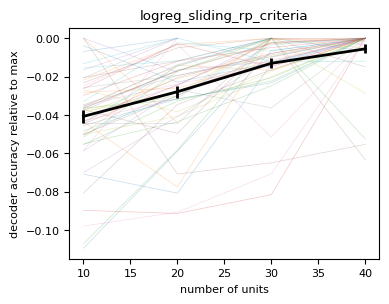

In [ ]:
sel_criteria='logreg_sliding_rp_criteria'
# sel_criteria='logreg_medium_criteria'
# sel_criteria='logreg_strict_criteria'

# sel_criteria_list=['logreg_medium_criteria','logreg_strict_criteria','logreg_sliding_rp_criteria']

fig,ax=plt.subplots(1,1,figsize=(4,3))

all_area_acc=[]

for rr, row in decoding_accuracy_by_n_units_df[sel_criteria].iterrows():
    # print(row['area'])
    # print(np.nanmax(row['accuracy']))
    if (np.sum(np.isnan(row['accuracy']))<=2) & (np.nanmax(row['accuracy'])>=0.06):
        ax.plot(row['n_units'],row['accuracy_minus_max'],label=row['area'],linewidth=0.5,alpha=0.25)
        all_area_acc.append(row['accuracy_minus_max'])

all_area_acc=np.array(all_area_acc)
all_area_acc_mean=np.nanmean(all_area_acc,axis=0)
ax.errorbar(row['n_units'],np.nanmean(all_area_acc,axis=0),
            stats.sem(all_area_acc,axis=0,nan_policy='omit'),color='k',
            linewidth=2,label='mean')

ax.set_xlabel('number of units')
ax.set_ylabel('decoder accuracy relative to max')
ax.set_title(sel_criteria)

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_20092\3979191214.py:18: RuntimeWarning: All-NaN slice encountered
  if (np.sum(np.isnan(row['accuracy']))<=2) & (np.nanmax(row['accuracy'])>=0.06):


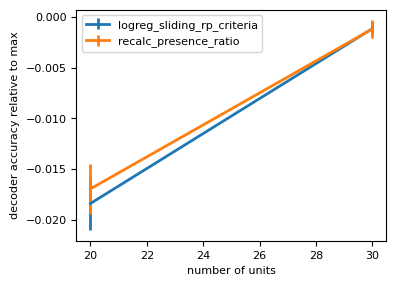

In [8]:
# sel_criteria='logreg_sliding_rp_criteria'
# sel_criteria='logreg_medium_criteria'
# sel_criteria='logreg_strict_criteria'

# sel_criteria_list=['logreg_medium_criteria','logreg_strict_criteria','logreg_sliding_rp_criteria']

sel_criteria_list=['logreg_sliding_rp_criteria','recalc_presence_ratio']

fig,ax=plt.subplots(1,1,figsize=(4,3))

for sel_criteria in sel_criteria_list:

    all_area_acc=[]

    for rr, row in decoding_accuracy_by_n_units_df[sel_criteria].iterrows():
        # print(row['area'])
        # print(np.nanmax(row['accuracy']))
        if (np.sum(np.isnan(row['accuracy']))<=2) & (np.nanmax(row['accuracy'])>=0.06):
            # ax.plot(row['n_units'],row['accuracy_minus_max'],label=row['area'],linewidth=0.5,alpha=0.25)
            all_area_acc.append(row['accuracy_minus_max'])

    all_area_acc=np.array(all_area_acc)
    all_area_acc_mean=np.nanmean(all_area_acc,axis=0)
    ax.errorbar(row['n_units'],np.nanmean(all_area_acc,axis=0),
                stats.sem(all_area_acc,axis=0,nan_policy='omit'),
                linewidth=2,label=sel_criteria)

ax.set_xlabel('number of units')
ax.set_ylabel('decoder accuracy relative to max')
ax.legend()
# ax.set_title(sel_criteria)

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_20092\990657166.py:17: RuntimeWarning: All-NaN slice encountered
  if (np.sum(np.isnan(row['accuracy']))<=3) & (np.nanmax(row['accuracy'])>=0.05):


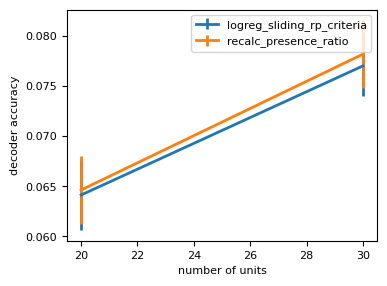

In [14]:
# sel_criteria='logreg_sliding_rp_criteria'
# sel_criteria='logreg_medium_criteria'
# sel_criteria='logreg_strict_criteria'

# sel_criteria_list=['logreg_medium_criteria','logreg_strict_criteria','logreg_sliding_rp_criteria']
sel_criteria_list=['logreg_sliding_rp_criteria','recalc_presence_ratio']

fig,ax=plt.subplots(1,1,figsize=(4,3))

for sel_criteria in sel_criteria_list:

    all_area_acc=[]

    for rr, row in decoding_accuracy_by_n_units_df[sel_criteria].iterrows():
        # print(row['area'])
        # print(np.nanmax(row['accuracy']))
        if (np.sum(np.isnan(row['accuracy']))<=3) & (np.nanmax(row['accuracy'])>=0.05):
            # ax.plot(row['n_units'],row['accuracy_minus_max'],label=row['area'],linewidth=0.5,alpha=0.25)
            all_area_acc.append(row['accuracy'])

    all_area_acc=np.array(all_area_acc)
    all_area_acc_mean=np.nanmean(all_area_acc,axis=0)
    ax.errorbar(row['n_units'],np.nanmean(all_area_acc,axis=0),
                stats.sem(all_area_acc,axis=0,nan_policy='omit'),
                linewidth=2,label=sel_criteria)

ax.set_xlabel('number of units')
ax.set_ylabel('decoder accuracy')
ax.legend()
# ax.set_title(sel_criteria)

In [111]:
# decoding_accuracy_by_n_units_df[sel_criteria]

<Axes: xlabel='area'>

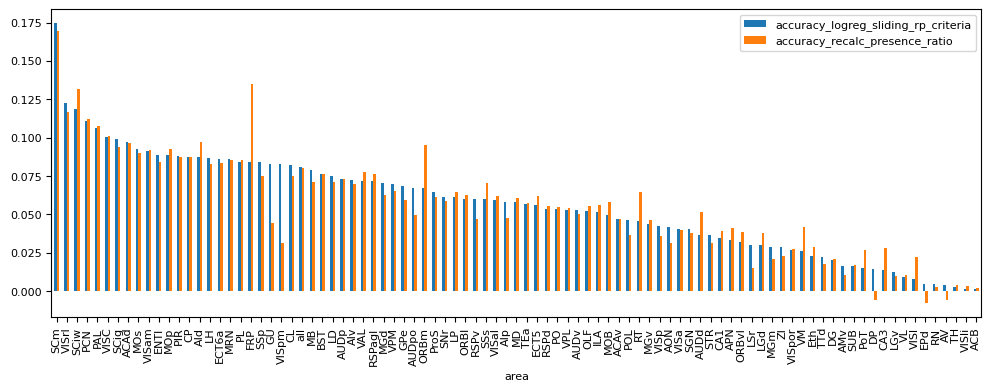

In [34]:
#compare across areas:
# average across areas, or only selected areas, or subtract max accuracy value then average

# make bar plot showing accuracy for each area across different criteria, with error bars

sel_criteria_list=['logreg_sliding_rp_criteria','recalc_presence_ratio']

sel_n_units_idx=1
n_units=plot_n_units[sel_n_units_idx]

all_area_accuracy={
    'area':[],
}
for sel_criteria in sel_criteria_list:
    all_area_accuracy['accuracy_'+sel_criteria]=[]
    all_area_accuracy['sem_'+sel_criteria]=[]

unique_areas=decoding_accuracy_by_n_units_df[sel_criteria_list[0]]['area'].unique()

for area in unique_areas:
    all_area_accuracy['area'].append(area)
    for sel_criteria in sel_criteria_list:
        row=decoding_accuracy_by_n_units_df[sel_criteria].query('area==@area')
        if len(row)>0:
            all_area_accuracy['accuracy_'+sel_criteria].append(row['accuracy'].iloc[0][sel_n_units_idx])
            all_area_accuracy['sem_'+sel_criteria].append(row['sem'].iloc[0][sel_n_units_idx])
        else:
            all_area_accuracy['accuracy_'+sel_criteria].append(np.nan)
            all_area_accuracy['sem_'+sel_criteria].append(np.nan)

all_area_accuracy_df=pd.DataFrame(all_area_accuracy)

var_plot_list=['accuracy_'+ll for ll in sel_criteria_list]
var_plot_str_0=var_plot_list[0]

all_area_accuracy_df=all_area_accuracy_df.sort_values(var_plot_str_0,ascending=False)
all_area_accuracy_df=all_area_accuracy_df.query('accuracy_logreg_sliding_rp_criteria.isna()==False and \
                                                accuracy_logreg_sliding_rp_criteria>0')

fig,ax=plt.subplots(1,1,figsize=(12,4))
all_area_accuracy_df.plot.bar(x='area',y=var_plot_list,ax=ax)

In [26]:
row['accuracy'].iloc[0][sel_n_units_idx]


0.02756236786469357

In [ ]:
#correlation between decoder models

area_wise_decoder_model_comp={}

#loop through areas

